# Lab 4

## import libs and connect to database

In [11]:
import pandas
import configparser
import psycopg2

In [12]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [13]:

conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname=db
                        )

In [14]:
cur=conn.cursor()

## q1

In [15]:
sql_q1 = """
            select * from demo.student
            """

In [16]:
df= pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,IA
3,s4@jmu.edu,s4,IA
4,s5@jmu.edu,s5,GS
5,s6@jmu.edu,s6,GS


## q2

In [17]:
sql_q2 = """
        select demo.professor.p_name,
        demo.course.c_name
        from demo.professor
        inner join demo.course
        on demo.professor.p_email = demo.course.p_email
        
        """

In [18]:
df= pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,xuebin wei,Intro to GIS
1,xuebin wei,data mining


## q3

In [19]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from demo.enroll_list
        group by c_number
        order by enrolled desc
        """

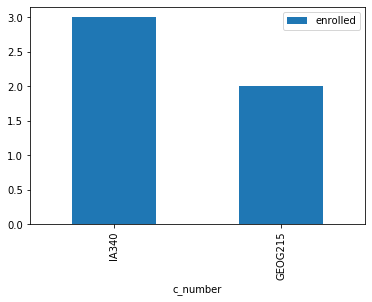

In [21]:
df= pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

## q4

In [22]:
sql_q4 = """
        select demo.professor.p_name,
        count(demo.course.c_name) as teaching_number
        from demo.professor
        inner join demo.course
        on demo.professor.p_email = demo.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

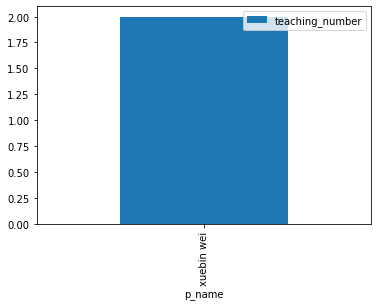

In [25]:
df= pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## q5

In [26]:
sql_q5_professor = """
                    insert into demo.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('new_p@jmu.edu','new_p','new_office')

In [27]:
cur.execute(sql_q5_professor)

In [28]:
conn.commit()

In [29]:
df=pandas.read_sql_query('select * from demo.professor',conn)
df[:]

,p_email,p_name,office
0,weixx@jmu.edu,xuebin wei,hhs112
1,new_p@jmu.edu,new_p,new_office


In [30]:
sql_q5_course = """
                    insert into demo.course(c_number,c_name,room,p_email)
                    values('{}','{}','{}','{}')
                    """.format('ia_new','new_c_name','online','new_p@jmu.edu')

In [31]:
cur.execute(sql_q5_course)

In [32]:
conn.commit()

In [33]:
df=pandas.read_sql_query('select * from demo.course',conn)
df[:]

,c_number,c_name,room,p_email
0,GEOG215,Intro to GIS,online,weixx@jmu.edu
1,IA340,data mining,online,weixx@jmu.edu
2,ia_new,new_c_name,online,new_p@jmu.edu


## q6

In [36]:
sql_q6_course = """
                update demo.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_p@jmu.edu','weixx@jmu.edu')

In [42]:
cur.execute(sql_q6_course)

In [41]:
#cur.execute('ROLLBACK')

In [43]:
conn.commit()

In [44]:
df=pandas.read_sql_query('select * from demo.course',conn)
df[:]

,c_number,c_name,room,p_email
0,ia_new,new_c_name,online,new_p@jmu.edu
1,GEOG215,Intro to GIS,online,new_p@jmu.edu
2,IA340,data mining,online,new_p@jmu.edu


In [45]:
sql_q6_professor = """
                delete from demo.professor
                where p_email = '{}'
                """.format('weixx@jmu.edu')

In [46]:
cur.execute(sql_q6_professor)

In [47]:
conn.commit()

In [48]:
df=pandas.read_sql_query('select * from demo.professor',conn)
df[:]

,p_email,p_name,office
0,new_p@jmu.edu,new_p,new_office


## close connection

In [49]:
cur.close()
conn.close()